In [1]:
import numpy as np
import math
#from sklearn.linear_model.ftrl_classifier import FtrlClassifier
from matplotlib import pylab as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble.gradient_boosting import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline 
import pandas as pd
import datetime as dt
#import xgboost as xgb
import time
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from sklearn.preprocessing import Imputer
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.kernel_ridge import KernelRidge


#print(result.trend)
#print(result.seasonal)
#print(result.resid)
#print(result.observed)


In [2]:
df=pd.read_excel("D:\\360MoveData\\Users\\historia\\Desktop\\MEng\\nutVal.xlsx",sheet_name="combination",dtype="object", names = ['Dates', 'Quantity', 'Pounds', 'value','Nutrition category'])
df['Dates'] = pd.to_datetime(df['Dates'])
df = df.set_index('Dates')
s = pd.Series(df['Pounds'], index=df.index )
s = s.resample('w').sum()
s.drop(s[s == False].index, inplace=True)
df1 = pd.DataFrame({'Dates':s.index, 'Pounds':s.values})
#print(df1.head(5))
#print(df1.shape)
#print(df1['Dates'][100])

In [3]:
# df1.index=pd.DatetimeIndex(freq='d',start=0,periods=570)
# result = seasonal_decompose(df1, model='additive')
# decomp = sm.tsa.seasonal_decompose(df1)
# decomp.plot()
# plt.show()

In [4]:
# my_imputer=Imputer()
# data_imputed = my_imputer.fit_transform(result.resid)
# data_resid=pd.DataFrame(data_imputed,columns=result.resid.columns)
# #print(data_resid)

Smooth the data below

In [5]:
# data = pd.read_csv('D:\\360MoveData\\Users\\historia\\Desktop\\Dessert.csv')
# #print(data)
# m=[]
# n=[]
# for i in range(len(data_resid['Dates'])):
#     m.append(i)
#     n.append(data_resid['Quantity'][i])
# m=np.array(m).reshape(-1,len(m)).T

# a=input('Input the train days:')
# b=input('Input the test days:')
# TRAIN_SIZE=int(a)
# TEST_SIZE=int(b)

In [6]:
# df=pd.read_excel("D:\\work\\CBE\\6880\\Data\\Receipt-Inquiry clean-new.xlsx",sheet_name="Sort by value and date",dtype="object", names = ['Dates', 'Quantity', 'Pounds', 'value'])
# df['Dates'] = pd.to_datetime(df['Dates'])
# df = df.set_index('Dates')
# s = pd.Series(df['Quantity'], index=df.index )
# s = s.resample('d').sum()
# s.drop(s[s == False].index, inplace=True)
# df1 = pd.DataFrame({'Dates':s.index, 'Quantity':s.values})
# print(df1)
# m=[]
# n=[]
# for i in range(len(df1['Dates'])):
#     m.append(i)
#     n.append(df1['Quantity'][i])
# m=np.array(m).reshape(-1,len(m)).T
# a=input('Input the train weeks:')
# b=input('Input the test weeks:')
# TRAIN_SIZE=int(a)
# TEST_SIZE=int(b)


In [7]:
##### Store the quantity data in a variable
Quantity_Supply = df1.loc[:, 'Pounds'].values.astype(float)
a=input('Input the train days:')
TRAIN_SIZE=int(a)
FULL_SIZE=int(input('Input the full size of the data:'))
TEST_SIZE=FULL_SIZE-TRAIN_SIZE
######################### if use other types the test size will change ########################################  

# Split the data into testing data and training data
train_data = Quantity_Supply[:TRAIN_SIZE]
test_data = Quantity_Supply[TRAIN_SIZE:]

##Normalizing the Data
#Scale the data to be between 0 and 1
# When scaling remember! You normalize both test and train data with respect to training data
# Because you are not supposed to have access to test data
scaler = MinMaxScaler()
train_data = train_data.reshape(-1,1)
test_data = test_data.reshape(-1,1)

#Train the Scaler with training data and smooth data
# smoothing_window_size = int(120)
# for i in range(0,240,smoothing_window_size):
#     scaler.fit(train_data[i:i+smoothing_window_size,:])
#     train_data[i:i+smoothing_window_size,:] = scaler.transform(train_data[i:i+smoothing_window_size,:])
smoothing_window_size = int(20)
for i in range(0,40,smoothing_window_size):
    scaler.fit(train_data[i:i+smoothing_window_size,:])
    train_data[i:i+smoothing_window_size,:] = scaler.transform(train_data[i:i+smoothing_window_size,:])

# You normalize the last bit of remaining data
print(train_data[i+smoothing_window_size:,:])
scaler.fit(train_data[i+smoothing_window_size:,:])
train_data[i+smoothing_window_size:,:] = scaler.transform(train_data[i+smoothing_window_size:,:])

# Reshape both train and test data
train_data = train_data.reshape(-1)

# Normalize test data
test_data = scaler.transform(test_data).reshape(-1)
all_quant_data = np.concatenate([train_data,test_data],axis=0)
#Now perform exponential moving average smoothing
#So the data will have a smoother curve than the original ragged data
# EMA = 0.0
# gamma = 0.1
# for ti in range(FULL_SIZE):
#   EMA = gamma*all_quant_data[ti] + (1-gamma)*EMA
#   all_quant_data[ti] = EMA
# train_data = all_quant_data[:TRAIN_SIZE]
# test_data = all_quant_data[TRAIN_SIZE:]
################################################################
# EMA = 0.0
# gamma = 0.1
# for ti in range(TRAIN_SIZE):
#   EMA = gamma*train_data[ti] + (1-gamma)*EMA
#   train_data[ti] = EMA
# # So the data will have a smoother curve than the original ragged data
# EMA = 0.0
# gamma = 0.1
# for ti in range(FULL_SIZE-TRAIN_SIZE):
#   EMA = gamma*test_data[ti] + (1-gamma)*EMA
#   test_data[ti] = EMA

Input the train days:113
Input the full size of the data:123
[[23136.  ]
 [ 9970.  ]
 [26968.  ]
 [12433.  ]
 [12150.  ]
 [ 5639.  ]
 [41424.  ]
 [58691.  ]
 [44046.  ]
 [29988.  ]
 [44035.  ]
 [54602.  ]
 [15511.  ]
 [14520.  ]
 [18705.  ]
 [39788.5 ]
 [32572.  ]
 [34214.  ]
 [15606.  ]
 [79435.  ]
 [11131.  ]
 [13233.  ]
 [71791.  ]
 [56053.  ]
 [29081.  ]
 [32633.  ]
 [25021.  ]
 [ 8631.  ]
 [29885.  ]
 [34882.  ]
 [ 7774.  ]
 [17985.  ]
 [10348.  ]
 [20948.  ]
 [12292.  ]
 [16467.  ]
 [34021.  ]
 [19471.  ]
 [20506.  ]
 [15767.  ]
 [28429.  ]
 [ 4841.  ]
 [33521.  ]
 [14230.5 ]
 [24173.  ]
 [ 9828.  ]
 [18460.  ]
 [ 8968.  ]
 [58211.  ]
 [ 9370.  ]
 [32369.  ]
 [12260.  ]
 [ 5469.  ]
 [ 9552.  ]
 [26206.  ]
 [28673.  ]
 [12850.  ]
 [35927.  ]
 [15312.  ]
 [12147.  ]
 [28412.  ]
 [ 1883.  ]
 [22168.  ]
 [37659.  ]
 [16921.  ]
 [19696.2 ]
 [16525.  ]
 [30970.  ]
 [15780.04]
 [14226.68]
 [43481.78]
 [15081.  ]
 [ 9051.  ]]


In [8]:
from sklearn import svm
clf = svm.SVR(C=60,cache_size=200, coef0=0.0, degree=4, epsilon=0.1,
    gamma=0.1, kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)
x = np.array(range(1,TRAIN_SIZE+1))
x = x.reshape(TRAIN_SIZE,-1)
x_t = np.array(range(TRAIN_SIZE+1,FULL_SIZE+1))
x_t = x_t.reshape(TEST_SIZE,1)
clf.fit(x,train_data)
pred_test=clf.fit(x, train_data).predict(x_t)
pred_train=clf.fit(x, train_data).predict(x)


In [9]:
print(len(x))
print(len(x_t))

113
10


In [10]:
mse=mean_squared_error(test_data, pred_test)
smse=np.sqrt(mean_squared_error(test_data, pred_test))
print('The MSE is',mse,'The smse is',smse)

The MSE is 0.03776519199690996 The smse is 0.1943326838102895


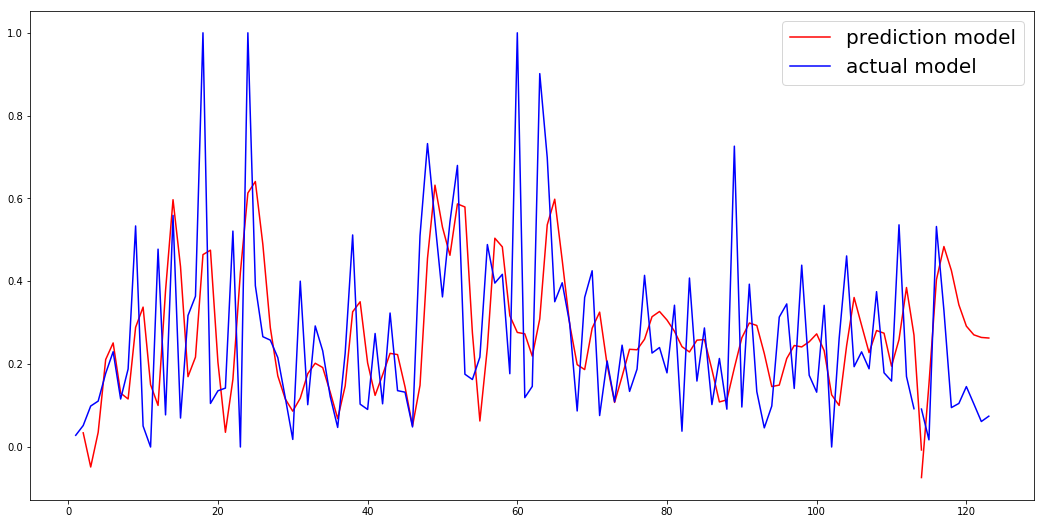

In [11]:
plt.figure(figsize = (18,9))
plt.plot([x for x in range(TRAIN_SIZE+1,TRAIN_SIZE+TEST_SIZE+1)], pred_test, linestyle='-', color='red', label='prediction model')  
plt.plot([x for x in range(2,TRAIN_SIZE+2)], pred_train, linestyle='-', color='red')
plt.plot(x,train_data, linestyle='-', color='blue', label='actual model')
plt.plot(x_t,test_data, linestyle='-', color='blue')
# plt.plot(x_c,y_c, linestyle='-', color='blue')
#plt.xlim(470,570)

plt.legend(loc='best', prop={'size':20})
plt.show()

In [12]:
# def svr_main(X, Y):
#     X_train = X[:TRAIN_SIZE]
#     Y_train = Y[:TRAIN_SIZE]

#     X_train=np.array(X_train).reshape(1,len(X_train))
#     Y_train=np.array(Y_train).reshape(len(Y_train),)
#     X_train=X_train.T
#     X_test = X[TRAIN_SIZE:]
#     Y_test = Y[TRAIN_SIZE:]
#     X_test =np.array(X_test).reshape(1,len(X_test))
#     Y_test =np.array(Y_test).reshape(len(Y_test),)
#     X_test =X_test.T
#     #print(X_train.shape)
#     #print(Y_train.shape)
#     #print(X_train)
#     #print(Y_train)

#     clf = SVR(kernel='rbf', C=1e3, gamma=0.01)
#     predict_list = []
#     y_pred=clf.fit(X_train,Y_train).predict(X_test)
#     predict_list=y_pred
# #    for i in range(TEST_SIZE):
# #        X = [[x] for x in range(i, TRAIN_SIZE+i)]
# #        clf.fit(X, Y[i:TRAIN_SIZE+i])
# #        y_pred = clf.predict([TRAIN_SIZE+1+i])
# #        predict_list.append(y_pred)

#     print(predict_list)
#     Y_test=Y_test.tolist()
#     print(Y_test)
#     mse=mean_squared_error(Y_test, predict_list)
#     smse=np.sqrt(mean_squared_error(Y_test, predict_list))
#     print('The MSE is',mse,'The smse is',smse)
#     origin_data = Y_test
#     od=origin_data
#     plt.plot([x for x in range(TRAIN_SIZE+1,TRAIN_SIZE+TEST_SIZE+1)], predict_list, linestyle='-', color='red', label='prediction model')  
#     plt.plot(X_test, Y_test, linestyle='-', color='blue', label='actual model')
# #    plt.xlim(X_train,366)
#     plt.legend(loc=1, prop={'size':12})
#     plt.show()


# start = time.clock()
# svr_main(,test_data)
# end = time.clock()
# run_time = end - start
   

# rt=run_time
# print(rt)